**Nowell Kevin Reyes - 20658133**

# Task 1. Regression 

**Motivation**: Using the dataset `bloodpressure-23.csv`, we will compare different regression models and choose the "best model fit" that allows us to predict systolic blood pressure accurately based on various features.

Our goal is to identify a regression model that provides the lowest Mean RMSE (Root Mean Square Error), which indicates the model's predictive accuracy. 




## Blood pressure dataset
Our first task is to load the data and view its properties. We will also import the `numpy` and `pandas` and `matplotlib` libraries to use for the rest of the exercies. 

*Note to the marker*: 

1. I have also included the `os` module to ensure that the workbook will load in the same folder as the data file (in case of issues).



In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import os
os.chdir('.') # set working directory to current folder


2. For **reproducibility**, keep the same seed value.

In [2]:
# Set a random seed for reproducibility
random_seed = 3032
np.random.seed(random_seed)

# load the data
df = pd.read_csv("bloodpressure-23.csv")

# View the column headers
print(df.columns)

# Dimension
print(df.shape)

# View the top of the data
print(df.head(3))

Index(['ID-NUMBER', 'AGE', 'ED-LEVEL', 'SMOKING STATUS', 'EXERCISE', 'WEIGHT',
       'SERUM-CHOL', 'SYSTOLIC', 'IQ', 'SODIUM', 'GENDER', 'MARITAL-STATUS',
       'NAME'],
      dtype='object')
(100, 13)
   ID-NUMBER  AGE  ED-LEVEL  SMOKING STATUS  EXERCISE  WEIGHT  SERUM-CHOL  \
0          1   27         2               1         1     120         193   
1          2   18         1               0         1     145         210   
2          3   32         2               0         0     118         196   

   SYSTOLIC   IQ  SODIUM GENDER MARITAL-STATUS  \
0       126  118     136      F              M   
1       120  105     137      M              S   
2       128  115     135      F              M   

                                                NAME  
0                            Braund, Mr. Owen Harris  
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  
2                             Heikkinen, Miss. Laina  


## Polynomial Regression
This task requires us to do the following:

1. Create polynomial regression models, to predict systolic pressure using the SERUM-CHOL feature, for degrees vary from 1 to 14. 
2. Perform 10-fold cross validation.
3. Calculate its square roots of the mean square errors (RMSE), and the mean RMSE.
4. Display the mean RMSEs for the 14 different degrees. 
5. Produce a cross validation error plot using the mean RMSE with 1 to 14 different degrees.

We will now import the required libraries from `sklearn` to create a polynomial model with cross validation and `matplotlib` to plot our cross-validation error plot

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Since we're only using the `SERUM-CHOL` feature to predict systolic pressure, we will not need to remove the ID-number column from the data and directly store the column values into our feature (`X`) and target (`y`) variables. We will also perform a training/testing split of 80/20.

In [4]:
# Extract the required fields 
X = df[['SERUM-CHOL']]   # features
y = df['SYSTOLIC']       # target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

Let's have a look at the relationship between the `SERUM-CHOL` feature and the `SYSTOLIC` target labels by plotting them in the same axis.

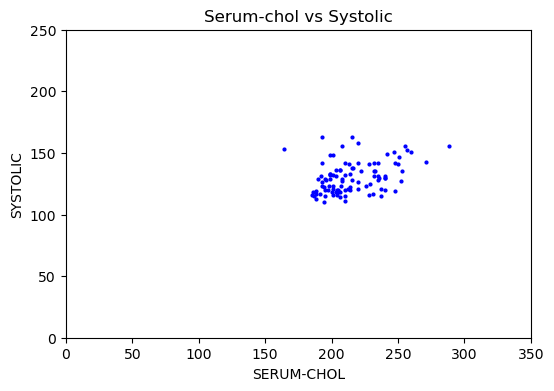

In [5]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'bo', ms = 2.0)  
plt.axis([0,350,0,250])
plt.xlabel("SERUM-CHOL")
plt.ylabel("SYSTOLIC")
plt.title("Serum-chol vs Systolic")
plt.show()

As we can see from the plot above, it's hard to make a conclusion as to which type of regression will fit the data, nor what the intercept and coefficients are and therefore we will conduct a couple of training models to see which one is "best fit"

We will now make a list of `degrees` from 1-14 for our polynomial model, and a dictionary of
`mean_rmse` to store the RMSE.

In [6]:
# list of integers from 1-14 representing degrees
degrees = list(range(1,15)) 
# dict to store RMSE
mean_rmse = {}     

We will create a loop that computes the RMSE of a polynomial regression model for varying degrees from 1-14 using `Pipeline`, `PolynomialFeatures` and `LinearRegression`.

In [7]:
# Create polynomial regression models of degrees 1-14 and record the mean RMSE
for degree in degrees:
    # train a polynomial model
    polynomial_regression = Pipeline([
            ("poly_features", PolynomialFeatures(degree = degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
    # Perform 10-fold cross validation and store the RMSE
    rmse = np.sqrt(-cross_val_score(polynomial_regression, X_train, y_train, 
                                    scoring = 'neg_mean_squared_error',
                                    cv = 10))
    # store the mean rmse
    mean_rmse[degree] = np.mean(rmse)

Let's look at the RMSE of varying degrees of the polynomial...

In [8]:
# Display the mean RMSEs for the 14 different degrees
for degree, rmse in mean_rmse.items():
    print(f"Degree {degree}: Mean RMSE = {rmse}")

Degree 1: Mean RMSE = 11.950612452651914
Degree 2: Mean RMSE = 12.037903178410549
Degree 3: Mean RMSE = 12.54244459451836
Degree 4: Mean RMSE = 13.932942960531971
Degree 5: Mean RMSE = 13.81501137078204
Degree 6: Mean RMSE = 15.094340331406077
Degree 7: Mean RMSE = 16.577589509369982
Degree 8: Mean RMSE = 18.389108627768763
Degree 9: Mean RMSE = 20.61755044998061
Degree 10: Mean RMSE = 23.415565223701496
Degree 11: Mean RMSE = 26.972495388650735
Degree 12: Mean RMSE = 31.50346528421244
Degree 13: Mean RMSE = 37.2275998249979
Degree 14: Mean RMSE = 44.32959980030038


and produce a cross-validation error plot against the number of degrees.
From here we can visualise the "best degree" with the minimum RMSE.

Best degree: 1, RMSE: 11.950612


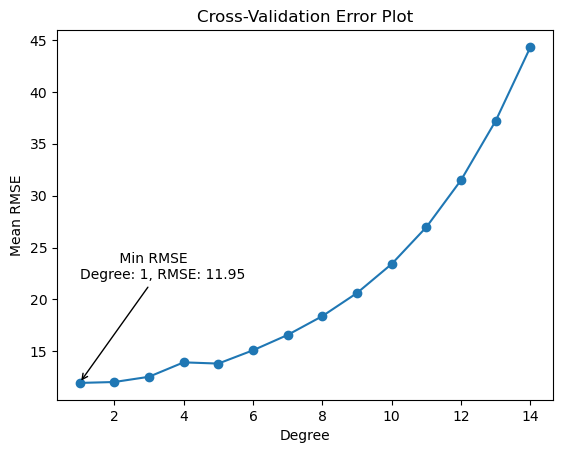

In [9]:
# Create the cross-validation error plot
plt.plot(degrees, list(mean_rmse.values()), marker='o')
plt.xlabel("Degree")
plt.ylabel("Mean RMSE")
plt.title("Cross-Validation Error Plot")

# Find the best degree with the lowest RMSE
best_degree = min(mean_rmse, key = mean_rmse.get)
best_mean_rmse = mean_rmse[best_degree]
print(f'Best degree: {best_degree}, RMSE: {best_mean_rmse:.6f}')

# Indicate the minimum RMSE from the plot
plt.annotate(f"         Min RMSE\nDegree: {best_degree}, RMSE: {best_mean_rmse:.2f}", 
             xy=(best_degree, best_mean_rmse), 
             xytext=(best_degree, best_mean_rmse + 10), 
             arrowprops=dict(arrowstyle='->'))
plt.show()

### Q3 - Select the best degree and briefly explain why. Print its intercept and ceofficients

Based on these results, the best degree appears to be **Degree 1 with a mean RMSE of 11.95**. This degree provides the lowest mean RMSE among all tested degrees, indicating that it has the best balance between model complexity and performance on the given dataset. 

Lower RMSE values indicate better predictive accuracy, and Degree 1 achieves the lowest RMSE, making it the most suitable choice for this polynomial regression model.

It is worth noting that this is the same as a Linear regression model

In [10]:
# Create the best polynomial regression model
# best_degree = 1
best_polymodel = Pipeline([
            ("poly_features", PolynomialFeatures(best_degree, include_bias=False)),
            ("lin_reg", LinearRegression()),
        ])
best_polymodel.fit(X_train, y_train)

# Print the intercept and coefficients
# coefficient and intercepts acquisition taken from
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
print(f"Intercept: {best_polymodel.named_steps['lin_reg'].intercept_}")
print(f"Coefficients: {best_polymodel.named_steps['lin_reg'].coef_}")

Intercept: 85.77423595998926
Coefficients: [0.21097717]


## Multiple Linear Regression
Tasks:

1. Create a multiple linear regression model to predict systolic pressure using all the relevant features.
2.  Print its coefficients.
3.  Perform 10-fold cross validation.
4.  Calculate its square roots of the mean square errors (RMSE), and the mean RMSE, and display the mean RMSE.

This time around, we will be dropping the `ID-Number`, `SYSTOLIC` and `NAME` columns before we store it in our feature variable. We will also convert the categorical variables into numerical using `pandas.getdummies()` 

In [11]:
# drop irrelevant features like id number, names and the systolic target column
X_ml = df.drop(columns = ["ID-NUMBER","SYSTOLIC", "NAME"])
X_ml = pd.get_dummies(X_ml, drop_first=True)
print(X_ml.head())

   AGE  ED-LEVEL  SMOKING STATUS  EXERCISE  WEIGHT  SERUM-CHOL   IQ  SODIUM  \
0   27         2               1         1     120         193  118     136   
1   18         1               0         1     145         210  105     137   
2   32         2               0         0     118         196  115     135   
3   24         2               0         1     162         208  108     142   
4   19         1               2         0     106         188  106     133   

   GENDER_M  MARITAL-STATUS_M  MARITAL-STATUS_S  MARITAL-STATUS_W  
0         0                 1                 0                 0  
1         1                 0                 1                 0  
2         0                 1                 0                 0  
3         1                 1                 0                 0  
4         0                 0                 1                 0  


In [12]:
# check target variable is the same
print(y.head())

0    126
1    120
2    128
3    129
4    119
Name: SYSTOLIC, dtype: int64


Here we will train a `LinearRegression` model on all the training features, using 10-fold cross validation and calculate the mean rmse. As is good practice, we will split our data into a training and testing set of 80/20.

In [13]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_ml, y, test_size=0.2)

# Create a multiple linear regression model
mlr_model = LinearRegression()

# Perform 10-fold cross-validation and calculate RMSE values
rmse_scores = np.sqrt(-cross_val_score(mlr_model, 
                                       X_train, y_train, 
                                       scoring='neg_mean_squared_error', 
                                       cv=10))

# Print the coefficients
mlr_model.fit(X_train, y_train)
coefficients = mlr_model.coef_

# formatting derived from https://www.geeksforgeeks.org/python-output-formatting/
print("Multiple Linear Regression Coefficients:")
for feature, coef in zip(X_ml.columns, coefficients):
    print("{:<20}: {:>10.6f}".format(feature, coef)) 

# Calculate the mean RMSE
mean_rmse = np.mean(rmse_scores)

# Display the mean RMSE
print(f"\nMean RMSE for Multiple Linear Regression: {mean_rmse}")

Multiple Linear Regression Coefficients:
AGE                 :   0.384928
ED-LEVEL            :  -0.692449
SMOKING STATUS      :   0.569310
EXERCISE            :  -0.550453
WEIGHT              :   0.280584
SERUM-CHOL          :   0.005472
IQ                  :  -0.005603
SODIUM              :   0.192607
GENDER_M            : -10.476664
MARITAL-STATUS_M    :   2.093987
MARITAL-STATUS_S    :   0.754375
MARITAL-STATUS_W    :  -3.458270

Mean RMSE for Multiple Linear Regression: 7.0448356043860985


## Multiple Ridge Regression

Tasks:
1. Build a ridge regression model of the above (i.e. item 4) using `α = 0.1`.
2. Print its coefficients.
3. Perform 10-fold cross validation.
4. Calculate its square roots of the mean square errors (RMSE), and the mean RMSE, and display the mean RMSE.

To build a Ridge Regression model of the multiple linear regression above, we will need to import the `Ridge` module from `sklearn.linear_model`

In [14]:
from sklearn.linear_model import Ridge

# Create a Ridge Regression model with α = 0.1
ridge_model = Ridge(alpha=0.1)

# Perform 10-fold cross-validation and calculate RMSE values
rmse_scores_ridge = np.sqrt(-cross_val_score(ridge_model, 
                                             X_train, y_train, 
                                             scoring='neg_mean_squared_error', 
                                             cv=10))

# Fit the Ridge model to the entire dataset
ridge_model.fit(X_train, y_train)

# Print the coefficients
coefficients_ridge = ridge_model.coef_

print("Ridge Regression Coefficients:")
for feature, coef in zip(X_ml.columns, coefficients_ridge):
    print("{:<20}: {:>10.6f}".format(feature, coef)) 
    
# Calculate the mean RMSE for Ridge Regression
mean_rmse_ridge = np.mean(rmse_scores_ridge)

# Display the mean RMSE for Ridge Regression
print(f"\nMean RMSE for Ridge Regression: {mean_rmse_ridge}")

Ridge Regression Coefficients:
AGE                 :   0.385524
ED-LEVEL            :  -0.695305
SMOKING STATUS      :   0.568694
EXERCISE            :  -0.556791
WEIGHT              :   0.278719
SERUM-CHOL          :   0.005521
IQ                  :  -0.005216
SODIUM              :   0.193409
GENDER_M            : -10.353278
MARITAL-STATUS_M    :   2.094149
MARITAL-STATUS_S    :   0.744271
MARITAL-STATUS_W    :  -3.408719

Mean RMSE for Ridge Regression: 7.035208290046232


### Q6 Select the best model of the three, and explains why briefly

**Results**:

- Polynomial Regression (Degree 1) has a Mean RMSE of approximately 11.95.
- Multiple Linear Regression has a Mean RMSE of approximately 7.04.
- Ridge Regression has a Mean RMSE of approximately 7.03.

Based on the Mean RMSE values, both Multiple Linear Regression and Ridge Regression outperform Polynomial Regression (Degree 1) in terms of predictive accuracy. This somewhat makes sense as there should be multiple factors that predict systolic pressure rather than just one metric (ie. serum-cholesterol levels).

Among these two, Ridge Regression has a slightly lower Mean RMSE, indicating slightly better performance.

Therefore, **Ridge Regression** is the best model of the three, as it provides better predictive accuracy while also helping mitigate multicollinearity and overfitting due to the regularization term introduced by the Ridge penalty (α = 0.1 in this case). It strikes a good balance between model complexity and accuracy, making it a preferable choice for this dataset.

# Task 2 - Classification